In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['healthy']


In [54]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [55]:
print(y)
print(y.shape)

0        1
1        1
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: healthy, Length: 50000, dtype: int64
(50000,)


In [56]:
print(y_train)

20330    0
17532    1
45819    0
34807    1
31888    0
        ..
21243    1
45891    0
42613    0
43567    0
2732     0
Name: healthy, Length: 40000, dtype: int64


In [57]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 19 columns]


 **K-NN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [60]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [61]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.49 % and k = [5]


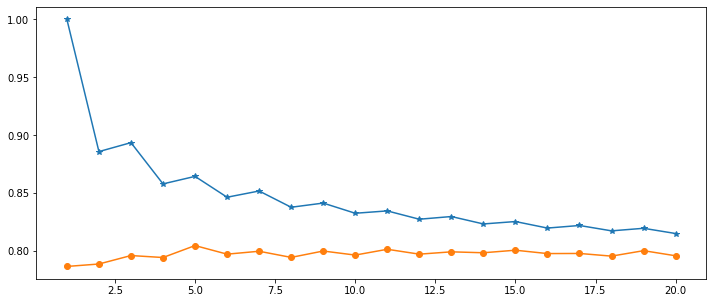

In [62]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [66]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8049

In [67]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6657,789,7446
1,1162,1392,2554
All,7819,2181,10000


In [68]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7446
           1       0.64      0.55      0.59      2554

    accuracy                           0.80     10000
   macro avg       0.74      0.72      0.73     10000
weighted avg       0.80      0.80      0.80     10000



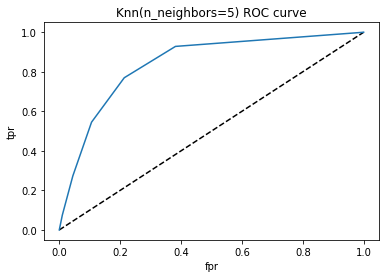

In [69]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [70]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.841203441074352

In [71]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.795425
Best Parameters: {'n_neighbors': 7}


**NAIVE** **BAYES**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [73]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [75]:
mod.score(X_test,y_test)

0.998

In [76]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[7433   13]
 [   7 2547]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       0.99      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [78]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.30945732
Iteration 2, loss = 0.04256740
Iteration 3, loss = 0.01238660
Iteration 4, loss = 0.00562944
Iteration 5, loss = 0.00298896
Iteration 6, loss = 0.00181815
Iteration 7, loss = 0.00119419
Iteration 8, loss = 0.00083331
Iteration 9, loss = 0.00059442
Iteration 10, loss = 0.00043791
Iteration 11, loss = 0.00033429
Iteration 12, loss = 0.00026209
Iteration 13, loss = 0.00020944
Iteration 14, loss = 0.00017173
Iteration 15, loss = 0.00014200
Iteration 16, loss = 0.00011958
Iteration 17, loss = 0.00010174
Iteration 18, loss = 0.00008721
Iteration 19, loss = 0.00007553
Iteration 20, loss = 0.00006594
Iteration 21, loss = 0.00005796
Iteration 22, loss = 0.00005166
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [79]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.9998
[[7446    0]
 [   2 2552]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [80]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

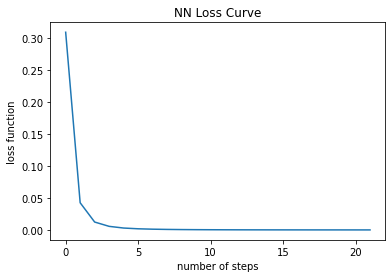

In [82]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [83]:
(mlp.intercepts_[0]).shape

(10,)

In [84]:
(mlp.coefs_[0]).shape

(19, 10)

In [85]:
mlp.intercepts_[0]

array([0.1716627 , 0.28954141, 0.85075048, 0.00186613, 0.61594685,
       0.61660497, 0.06470785, 0.28205761, 0.45395915, 0.21191857])

In [86]:
mlp.coefs_[0]

array([[ 0.04484774,  0.00594977, -0.22363066,  0.3990953 ,  0.15979123,
        -0.1962973 ,  0.26634718, -0.12258822, -0.32139754, -0.47184493],
       [-0.68694274, -0.60193451, -0.65492073, -0.04810666,  0.44578547,
         1.12256642, -0.89184739,  0.70443813, -0.76877577, -0.6337681 ],
       [-0.42490505, -0.13055997, -0.01368455,  0.1197253 ,  0.64855848,
         0.27029305, -0.61811563, -0.437488  ,  0.09673978,  0.23940961],
       [-0.34869684,  0.04301763,  0.10433112,  0.39320169, -0.12815762,
        -0.0783953 , -0.06920543,  0.01704078,  0.32993101, -0.41442522],
       [-0.38459571,  0.23056654,  0.22787389,  0.00997956,  0.10947511,
         0.1898381 , -0.66612897,  0.22084226,  0.46324381, -0.37511201],
       [-0.14067376, -0.02607903, -0.08038872,  0.55472346,  0.45350906,
         0.01177726, -0.65749358,  0.21157205, -0.88939616, -0.19846452],
       [-0.25336331,  0.1985319 ,  0.0539625 ,  0.37322541,  0.33430422,
        -0.28552665,  0.06612644, -0.42622325

In [87]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 1.00886856
Iteration 2, loss = 0.67560944
Iteration 3, loss = 0.26436974
Iteration 4, loss = 0.05830928
Iteration 5, loss = 0.01970502
Iteration 6, loss = 0.00836628
Iteration 7, loss = 0.00455211
Iteration 8, loss = 0.00292309
Iteration 9, loss = 0.00211373
Iteration 10, loss = 0.00160550
Iteration 11, loss = 0.00134002
Iteration 12, loss = 0.00101433
Iteration 13, loss = 0.00082441
Iteration 14, loss = 0.00073163
Iteration 15, loss = 0.00044602
Iteration 16, loss = 0.00035925
Iteration 17, loss = 0.00030234
Iteration 18, loss = 0.00025686
Iteration 19, loss = 0.00021975
Iteration 20, loss = 0.00018937
Iteration 21, loss = 0.00016377
Iteration 22, loss = 0.00013979
Iteration 23, loss = 0.00012136
Iteration 24, loss = 0.00010618
Iteration 25, loss = 0.00009344
Iteration 26, loss = 0.00008255
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.9998
[[7445    1]
 [   1 2553]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [90]:
logreg.intercept_.T

array([-2.6882162])

In [91]:
logreg.coef_.T

array([[-7.18189067e-03],
       [ 3.42080451e+00],
       [ 5.97212401e-01],
       [ 6.88700997e-02],
       [ 2.22352931e-01],
       [ 6.03132518e-01],
       [ 9.53539948e-02],
       [-6.43907576e-04],
       [-7.52838771e-04],
       [ 8.15566020e-03],
       [ 4.45546683e-02],
       [ 2.26779407e-02],
       [ 3.31872034e-02],
       [-1.68281639e-01],
       [ 3.01851692e-02],
       [-1.76637455e-03],
       [ 1.00930239e-01],
       [-2.18577461e-01],
       [ 7.55878122e-02]])

In [92]:
print(y_test)

11841    0
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    0
2217     0
Name: healthy, Length: 10000, dtype: int64


In [93]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[7446    0]
 [   0 2554]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [94]:
#!pip install scikit-plot

In [95]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

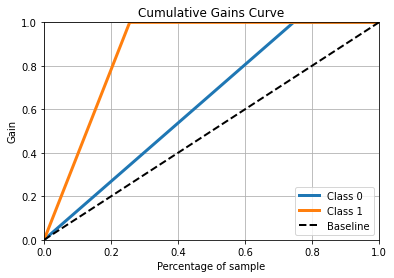

In [96]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

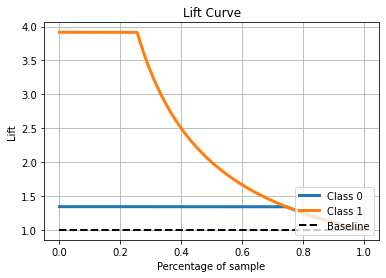

In [97]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()